# Bank Customer Attrition


## 1. Introduction

**Bank Customer Attrition:**

Bank customer attrition, also known as ***churn***, refers to the rate at which customers stop using a bank's services or close their accounts. It essentially measures the loss of customers over a specific period. 



**The aim of this study are following**:
1. To find factors that contribute to customer churn.
2. Build a prediction model that will perform the following:
   * Classify if a customer is going to churn or not.
   * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.


## 2. Data set review & preparation
Data is taken from Kaggle-`https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights/data`

**In this section we will try to explore the structure of our data**:
  1. To understand the input space the data set
  2. And to prepare the sets for exploratory and prediction tasks as described in section 1


In [1]:
# Importing the function

import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows=None
pd.options.display.max_columns=None


import matplotlib.pyplot as plt
%matplotlib inline

#from ydata_profiling import ProfileReport-----this can be used for fast overview of dataset
#from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import SMOTE  #synthetic minority over sampling technique 
#from sklearn.model_selection import train_test_split,cross_val_score
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBRFClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OrdinalEncoder

In [2]:
# loading the dataset to panda dataframe
df=pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")

In [3]:
df.shape

(10000, 18)

The df has 10000 rows and 18 attributes.We will review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [4]:
# checking for null values
df.isnull().sum()  # no null values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

No null values

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 



From the above, we will not require the first 3 attributes as they are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [8]:
# removing the unwanted columns
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [9]:
# printing the unique values from  columns 
vec=["CreditScore","Point Earned","Balance","EstimatedSalary"]
for col in df.columns:
    if col not in vec:
      print(col,df[col].unique())
      print("*"*50)

Geography ['France' 'Spain' 'Germany']
**************************************************
Gender ['Female' 'Male']
**************************************************
Age [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
**************************************************
Tenure [ 2  1  8  7  4  6  3 10  5  9  0]
**************************************************
NumOfProducts [1 3 2 4]
**************************************************
HasCrCard [1 0]
**************************************************
IsActiveMember [1 0]
**************************************************
Exited [1 0]
**************************************************
Complain [1 0]
**************************************************
Satisfaction Score [2 3 5 4 1]
**************************************************
Card Type ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM

The customer data is taken from European country namely France,Spain and Germany

In [10]:
df.sample(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
4946,546,France,Female,47,8,0.00,1,1,1,66408.01,1,1,3,SILVER,432
4097,597,Spain,Female,26,7,0.00,2,1,0,110253.20,0,0,4,SILVER,235
8648,809,Spain,Female,48,2,0.00,1,1,0,160976.85,1,1,1,GOLD,994
5854,481,France,Female,34,5,0.00,2,1,1,125253.46,0,0,4,PLATINUM,848
6317,450,France,Male,29,7,117199.80,1,1,1,43480.63,0,0,2,GOLD,483
29,411,France,Male,29,0,59697.17,2,1,1,53483.21,0,0,2,GOLD,343
6899,569,France,Male,66,2,0.00,1,1,0,130784.20,1,1,1,DIAMOND,345
2754,682,France,Male,42,0,0.00,1,1,1,160828.98,0,0,5,SILVER,262


From the above, a couple of question linger:
1. The data appears to be a snapshot as some point in time e.g. the balance is for a given date which leaves a lot of questions:
    * What date is it and of what relevance is this date ?
    * Would it be possible to obtain balances over a period of time as opposed to a single date?
2. There are customers who have exited but still have a balance in their account! What would this mean? Could they have exited from a product and not the bank?
3. What does being an active member mean and are there difference degrees to it? Could it be better to provide transaction count both in terms of credits and debits to the account instead?
4. A break down to the products bought into by a customer could provide more information topping listing of product count
5. What products for which customers had complained ? On what basis they have given satisfaction score ?

For this exercise, we proceed to model without context even though typically having context and better understanding of the data extraction process would give better insight and possibly lead to better and contextual results of the modelling process

In [11]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

So we have 6(ActiveMember,HasCrCard ,Exited  and Card Type included) categorical variables and 9 continuous variables

In [12]:
# checking for the class imbalance
print(df["Exited"].value_counts())

Exited
0    7962
1    2038
Name: count, dtype: int64


##### **Insights**
1. RowNumber,CustomerId and Surname are removed as it is not required for modeling
2. No missing values in dataset
3. Class imbalance identified in the target(=Exited)

## 3. Exploratory Data Analysis

In this section we will try find how other attributes are related or influence the 'Exited' status .

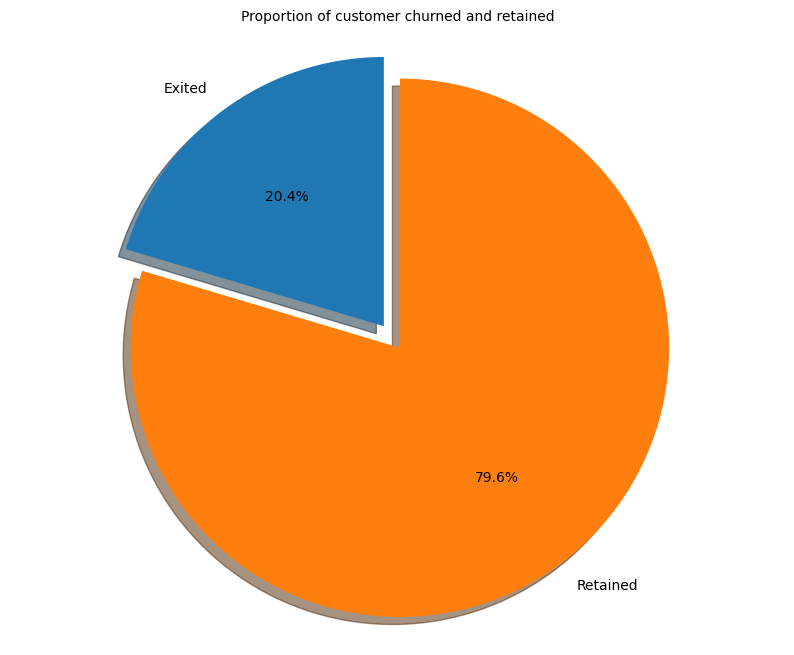

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

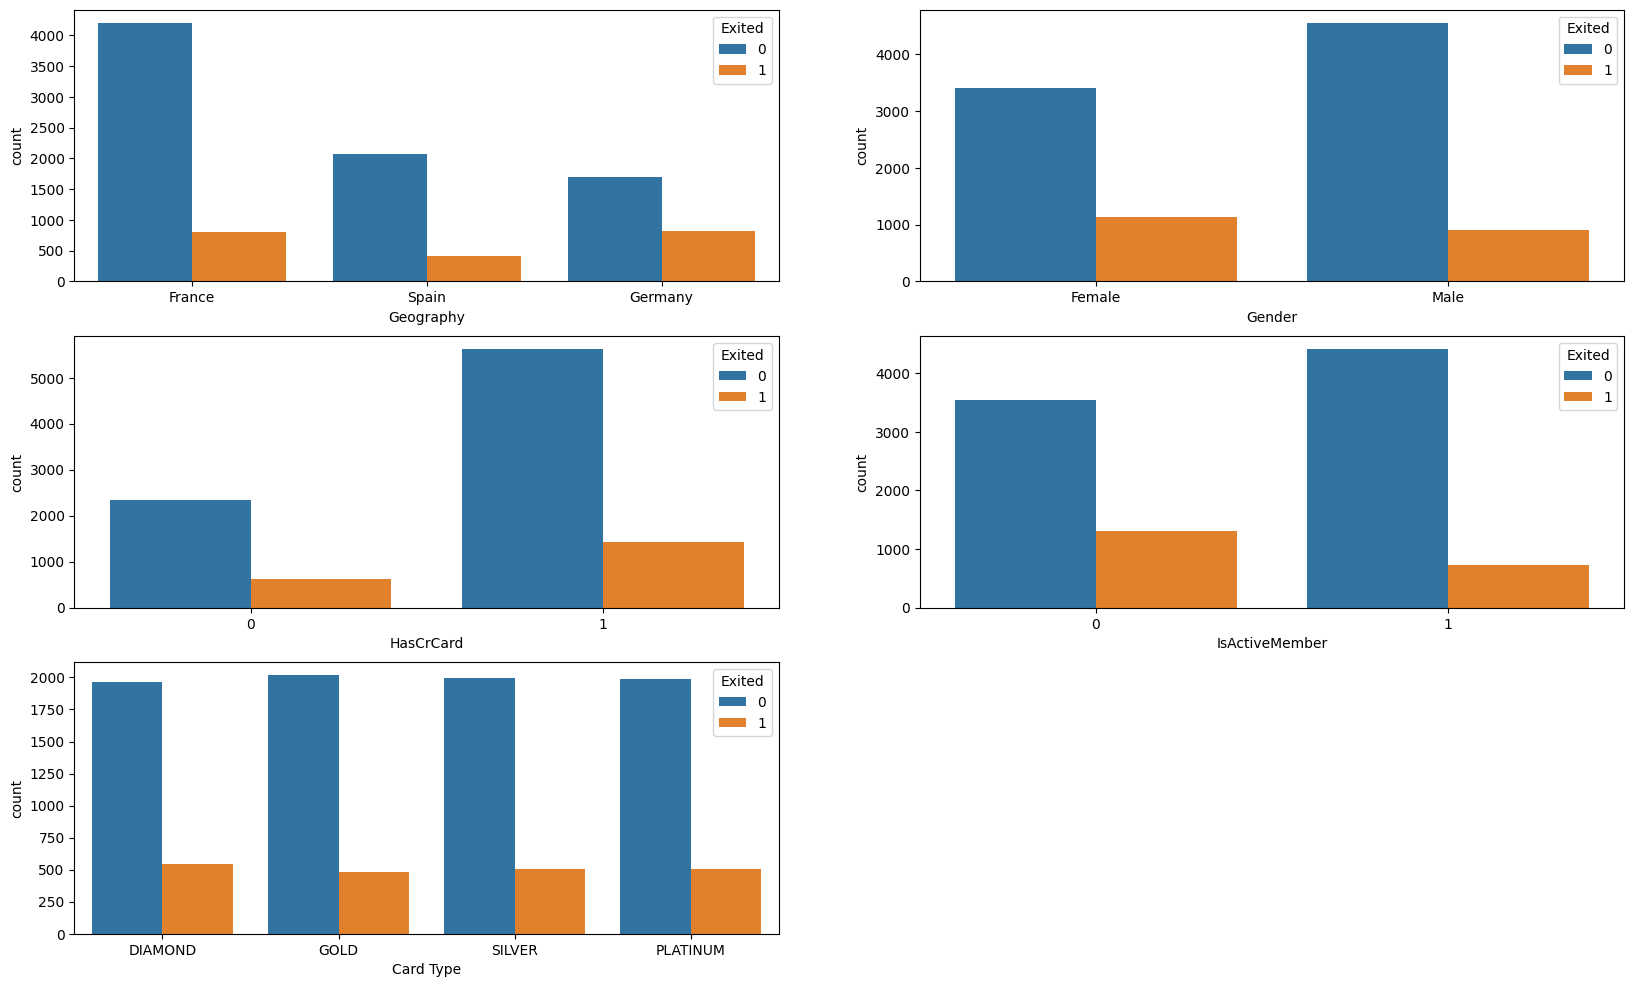

In [14]:
fig, axarr = plt.subplots(3,2 , figsize=(20, 12))

sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])
sns.countplot(x='Card Type', hue='Exited', data=df, ax=axarr[2][0])

axarr[2][1].axis('off')

 Relations based on the continuous data attributes

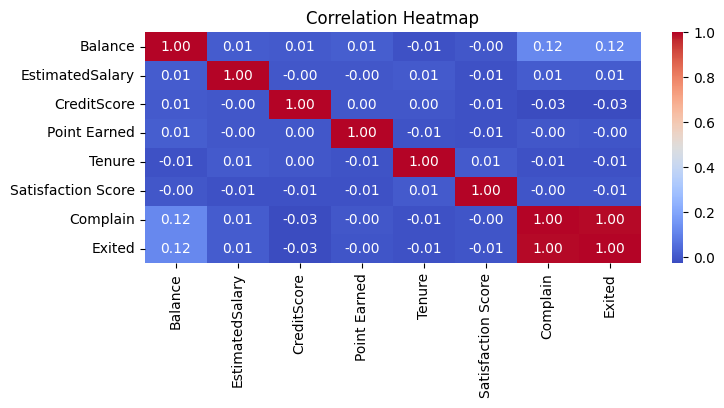

In [15]:
plt.figure(figsize=(8,3))
sns.heatmap(df[["Balance","EstimatedSalary","CreditScore","Point Earned","Tenure","Satisfaction Score","Complain","Exited"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

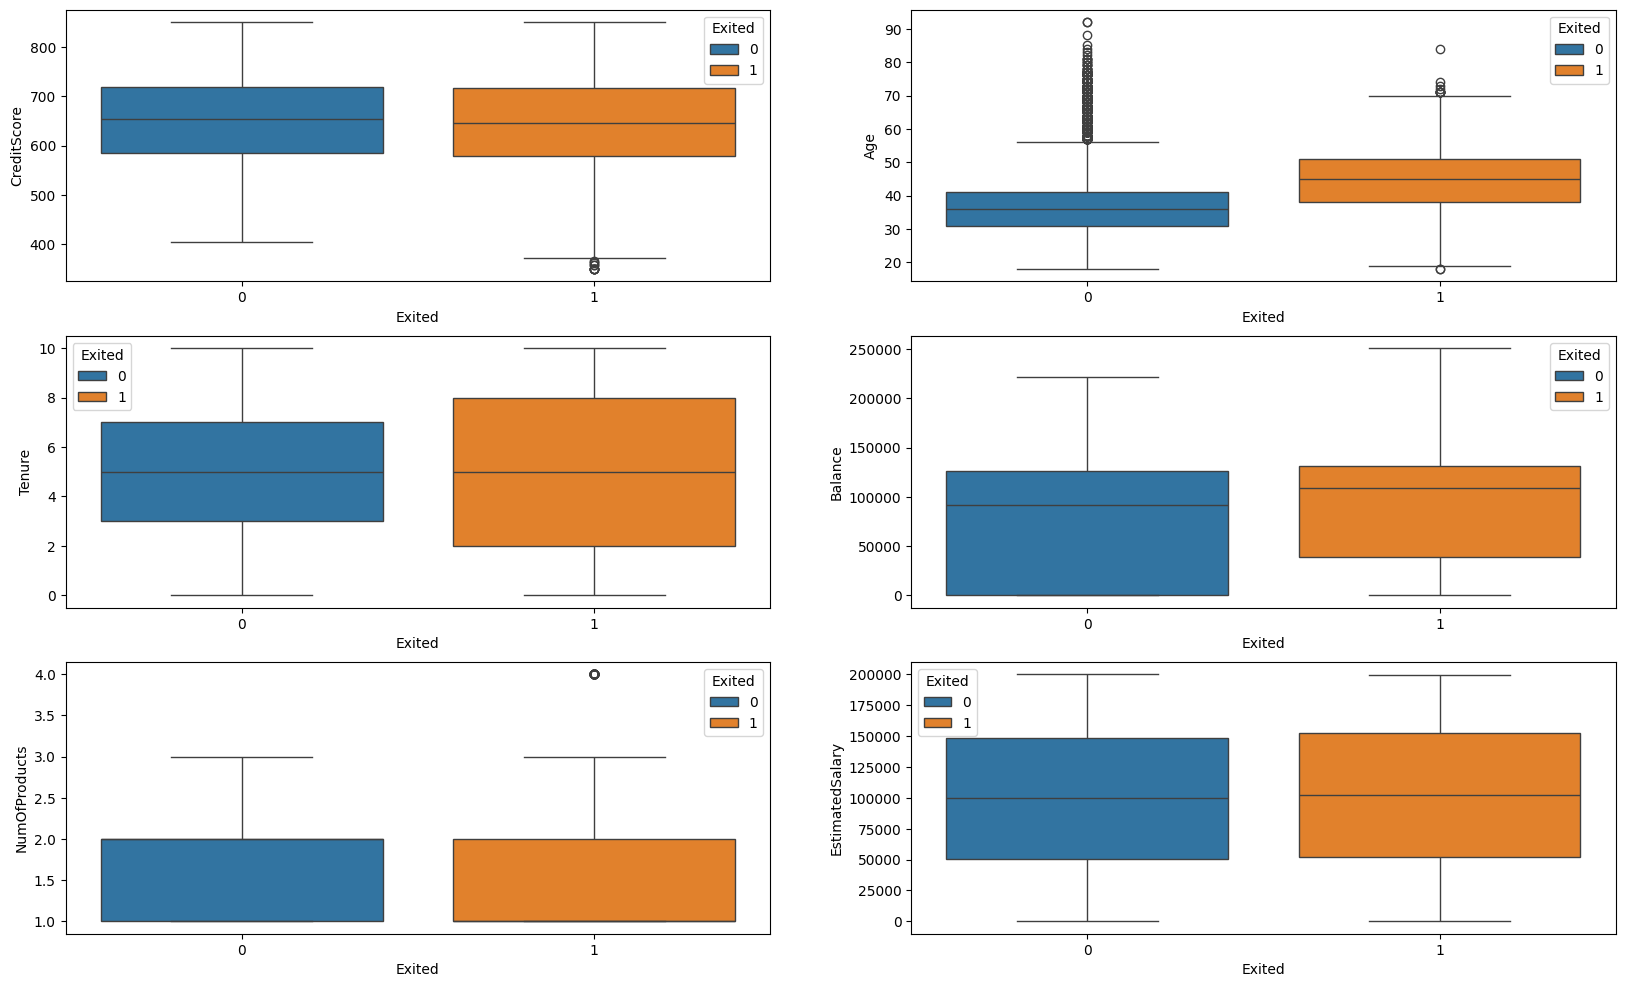

In [16]:

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])


We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers. 
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
*  Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

## 4. Feature engineeering

We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [17]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

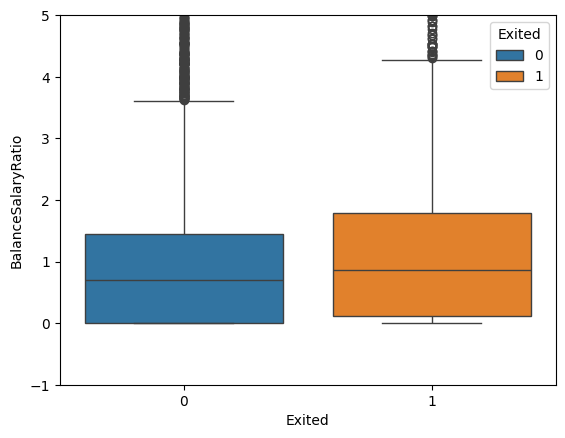

In [18]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

In [19]:
# checking the class distribution of target column
print(df["Exited"].value_counts())

Exited
0    7962
1    2038
Name: count, dtype: int64


##### **Insights**
1. RowNumber,CustomerId and Surname are removed as it is not required for modeling
2. No missing values in dataset
3. Class imbalance identified in the target(=Exited)


### Exploratory Data Analysis

In [20]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [21]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### Numerical features----- Analysis
Understanding the distribution of numerical features

In [22]:
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")
    
    # calculate the mean and median values for the columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    # adding vertical lines for mean and median
    plt.axvline(col_mean,color="red",linestyle="--",label="mean")
    plt.axvline(col_median,color="blue",linestyle="--",label="median")
    
    plt.legend()
    plt.show()
    

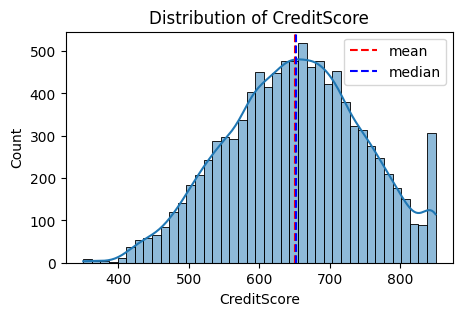

In [23]:
plot_histogram(df,"CreditScore")

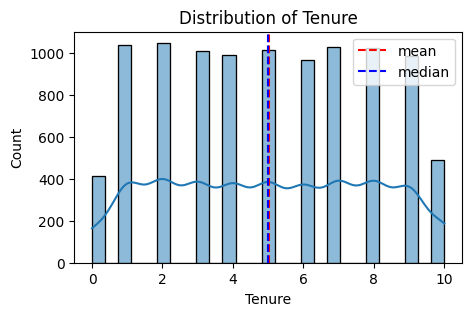

In [24]:
plot_histogram(df,"Tenure")

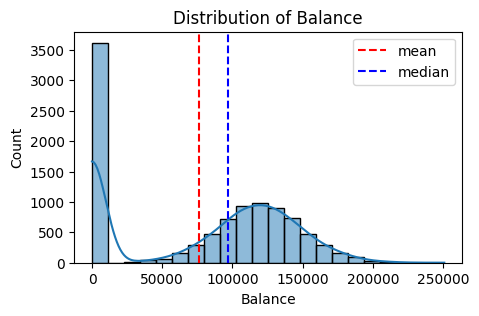

In [25]:
plot_histogram(df,"Balance")

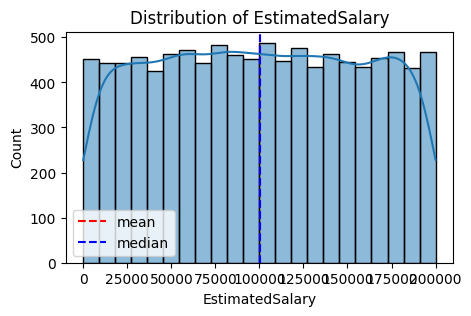

In [26]:
plot_histogram(df,"EstimatedSalary")

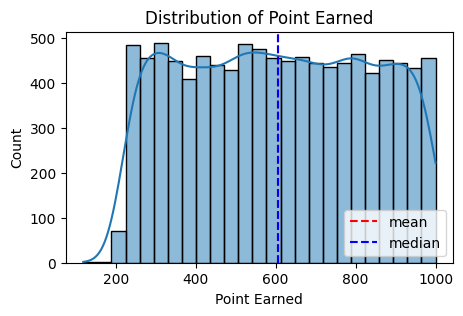

In [27]:
plot_histogram(df,"Point Earned")

Box plot for numerical features/ outliers

In [28]:
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f" Box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show

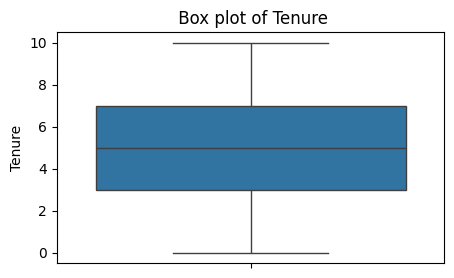

In [29]:
plot_boxplot(df,"Tenure")

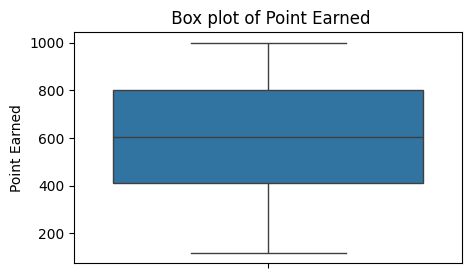

In [30]:
plot_boxplot(df,"Point Earned")

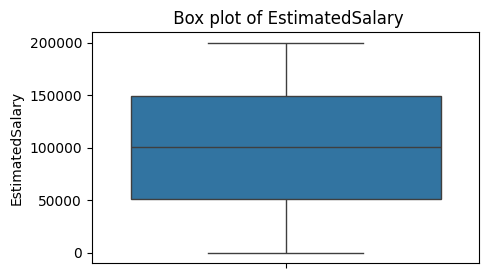

In [31]:
plot_boxplot(df,"EstimatedSalary")

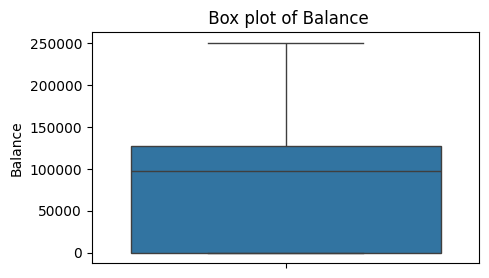

In [32]:
plot_boxplot(df,"Balance")

Correlation Heatmap for numerical columns

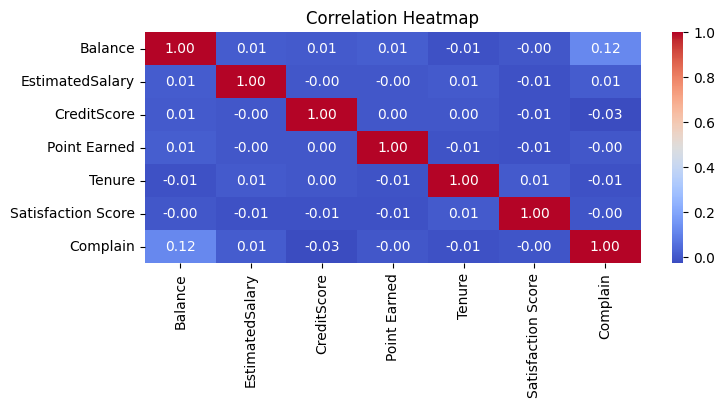

In [33]:
plt.figure(figsize=(8,3))
sns.heatmap(df[["Balance","EstimatedSalary","CreditScore","Point Earned","Tenure","Satisfaction Score","Complain"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
object_columns=df.select

AttributeError: 'DataFrame' object has no attribute 'select'